### Alex Teixeira da Silva<p>

# Simulação de Caminhos Modelo Binomial

Primeiro apresentamos o algoritmo. Para simularmos o modelo binomial precisamos saber os valores
de:
- S0 , preço inicial da ação (preço no tempo 0).
- T , o tempo final (em dias) de simulação.
- ∆T , o tempo (em dias) transcorrido entre cada lançamento de moeda no modelo binomial.
- u e d , up e down de cada intervalo ∆T .
- p , a probabilidade de subida do valor da ação.


In [78]:
S0 = 12
T  = 20
dT = 0.5
u  = 1.1
d  = 0.9
p  = 1/3

In [79]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = (11,6)

In [80]:
def caminho_de_preço(S0 , T, dT, u, d, p,log = True, normalizado = False):
    S = S0 ;
    t = 0 ;
    caminho = [0]*int(T/dT)             #vetor que contem os resultados do caminho
    c       =  0                        #indice do caminho
    while t < T:
        t = t + dT
        if random() < p: S = S*u 
        else: S = S*d
        if log == True:
            caminho[c] = math.log(S)    #pegando log(s) para retornar o rendimento
        else: caminho[c] = S
        c+=1
    if normalizado == True:             
        return np.array(caminho)/caminho[0]
    return caminho


 ### Analisando o comportamento do modelo

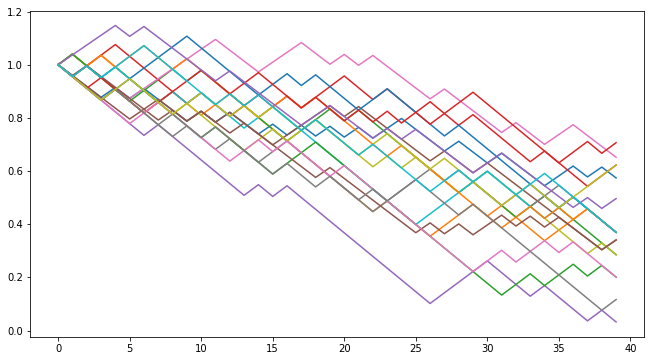

In [81]:
for i in range(20):
    caminho = caminho_de_preço(
        S0 , T, dT, u, d, p,
        log         = True ,
        normalizado = True
    )
    plt.plot(caminho)


Notamos aqui que esperamos que $S(t)=S_0 (1+mu)^{t}$, o valor médio de crescimento da ação sendo $mu$. Tomando $Y=log(S)$ teremos que
$Y(t) = Y_0 + t k$,  com $k=log(1+mu)$.   Assim no gráfico em escala log, o coeficiente angular $k$ está relacionado com o crescimento medio $mu$.

### Boxplot com valores finais de ação por caminho

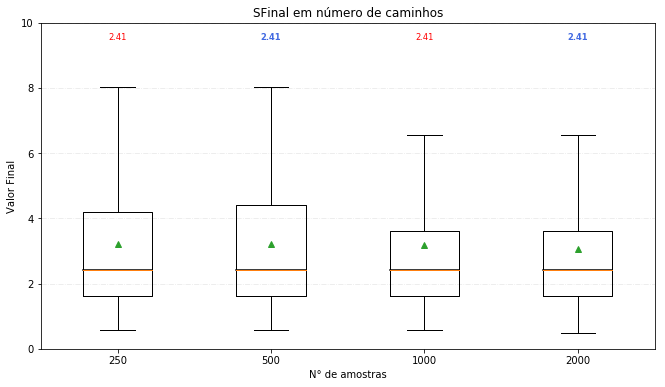

[3.2139064972526215, 3.2098709204324916, 3.1705282547783358, 3.064962465537224]

In [133]:
preços      =  [ ]
for i in range(2000):
    preço_final =  caminho_de_preço(
        S0 , 
        T, 
        dT, 
        u, 
        d, 
        p, 
        log = False
    )[-1]
    preços      += [preço_final]
    
data = [preços[:250],                 #250  caminhos
        preços[:500] ,                #500  caminhos
        preços[:1000],                #1000 caminhos
        preços        ]               #2000 caminhos
fig, ax1 = plt.subplots()

bp = ax1.boxplot(data,showfliers=False,labels = [250,500,1000,2000], showmeans= True)


# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-.', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('SFinal em número de caminhos')
ax1.set_xlabel('N° de amostras')
ax1.set_ylabel('Valor Final')

# Now fill the boxes with desired colors
boxColors = ['red', 'royalblue']
numBoxes = 4
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = np.column_stack([boxX, boxY])
    
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
top = 10
bottom = 0
ax1.set_ylim(bottom, top)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['normal', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', size='small', weight=weights[k],
             color=boxColors[k])



plt.show()
medias1 = []
for i in range(numBoxes):
    medias1 += [bp['means'][i].get_ydata()[0]]

medias1

### Refazendo com $dT = 0.25$, $\sqrt{u}$ e $\sqrt{d}$

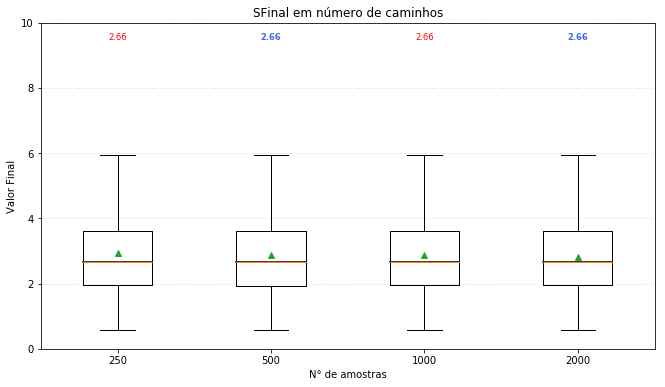

[2.9491357091017276,
 2.8871908383852696,
 2.8720014577689086,
 2.8183377235611524]

In [119]:
preços      =  [ ]
for i in range(2000):
    preço_final =  caminho_de_preço(
        S0 , 
        T, 
        dT  = 0.25, 
        u   = u**(1/2), 
        d   = d**(1/2), 
        p   = p, 
        log = False
    )[-1]                             #indice [-1] para pegar apenas o valor final
    preços+=[preço_final]
    
data = [preços[:250],                 #250  caminhos
        preços[:500] ,                #500  caminhos
        preços[:1000],                #1000 caminhos
        preços        ]               #2000 caminhos

fig, ax1 = plt.subplots()

bp = ax1.boxplot(data,showfliers=False,labels = [250,500,1000,2000],showmeans= True)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-.', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('SFinal em número de caminhos')
ax1.set_xlabel('N° de amostras')
ax1.set_ylabel('Valor Final')

# Now fill the boxes with desired colors
boxColors = ['red', 'royalblue']
numBoxes = 4
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = np.column_stack([boxX, boxY])
    
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
top = 10
bottom = 0
ax1.set_ylim(bottom, top)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['normal', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', size='small', weight=weights[k],
             color=boxColors[k])



plt.show()
medias2 = []
for i in range(numBoxes):
    medias2 += [bp['means'][i].get_ydata()[0]]
medias2

É interesaante notarmos aqui que não houve grande variação entre os bloxpots de cada caso entre si, mas ao reduzirmos o intervalo de $dT$ e consequentemente com o aumento de pontos ao logo do caminho, tivemos uma redução da amplitude dos valores no boxplot.<p>
Também notamos que, especialmente para o segundo caso, fica visível a aproximação da média com a mediana. 

## Comparando com valores teóricos

### Média esperada

Determinemos qual seria a média esperada (segundo o texto) nos dois casos e comparemos com os resultados obtidos. Fórmula:

$(pu + qd)^{n}$

In [84]:
media_esperada1 = S0*(p*u + (1-p)*d)**len(caminho)
media_esperada2 = S0*(p*(u**(1/2)) + (1-p)*(d**(1/2)))**(2*len(caminho))

In [85]:
media_esperada1

3.0920817907757616

In [86]:
media_esperada2

2.8194818543840814

### Erro relativo obtido

Queremos estudar o quanto nos aproximamos da média na medida que o número de caminhos
aumenta. <p>Façamos um gráfico com o número de caminhos (250, . . . , 2000) no eixo x e erro relativo
na média no eixo y (módulo da média obtida menos média esperada dividido por média esperada).


In [134]:
erro_relativo1 = []
for i in medias1:
    erro = np.abs(i - media_esperada1)/media_esperada1
    erro_relativo1 += [erro]

In [120]:
erro_relativo2 = []
for i in medias2:
    erro = np.abs(i - media_esperada2)/media_esperada2
    erro_relativo2 += [erro]

In [135]:
print(erro_relativo1)

[0.039398927557571385, 0.03809379493392322, 0.02537011285943151, 0.008770571761536068]


In [121]:
print(erro_relativo2)

[0.04598499348951095, 0.024014690463748094, 0.018627395421312316, 0.00040579471052453527]


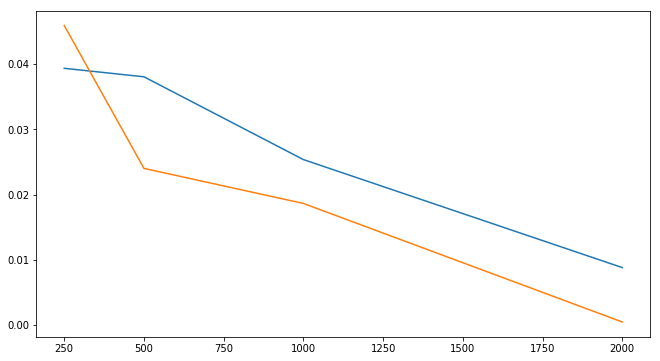

In [139]:
labels  = [250,500,1000,2000]
erros1  = plt.plot(labels, erro_relativo1)
erros2  = plt.plot(labels, erro_relativo2)

Assim vemos que o erro relativo cai acentuadamente ao aumentarmos o número de caminhos, mas como estamos falando de um processo que não pode chegar a um erro zero e cruzá-lo, sofremos uma desaceleração da queda do erro a medida que o número de caminhos aumenta.

# Conclusão

Concluímos que a melhor simulação advém daquela com maior número de pontos ao logo de cada caminho, e com maior número de caminhos simulados. <p> 
Em uma situação de limitação computacional, deve optar pela forma com mais pontos ao logo do caminho mesmo que em detrimento do número de caminhos simulados, pois obtemos uma gama de resultados mais concentrada em comparação com a de menos pontos.<p>
Por fim, como mostrado pelos resultados obtidos, a fórmula teórica prove uma excelente aproximação para os resultados a longo prazo, ou seja, após várias exposições dos eventos estocásticos.